<a href="https://colab.research.google.com/github/summermccune/Tokenization-Testing-for-Malware-Data/blob/main/Word2Vec/classifiers_UNIGRAMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Read in and Split Data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Tokenization-Data/UnigramFilteredOpcodes.csv')
X_SVM = np.load('/content/drive/MyDrive/Tokenization-Data/SVM_embeddings.npy')
X_ELSE = np.load('/content/drive/MyDrive/Tokenization-Data/ALL_embeddings.npy')
y = df['MalwareType']
X_train_SVM, X_test_SVM, y_train_SVM, y_test_SVM = train_test_split(X_SVM, y, test_size=0.2, random_state=42)
X_train_ELSE, X_test_ELSE, y_train_ELSE, y_test_ELSE = train_test_split(X_ELSE, y, test_size=0.2, random_state=42)

## SVM

Accuracy: 0.86875
Confusion Matrix:
[[189   7   2  11]
 [ 16 190   0   7]
 [  0   3 189   2]
 [ 48   8   1 127]]


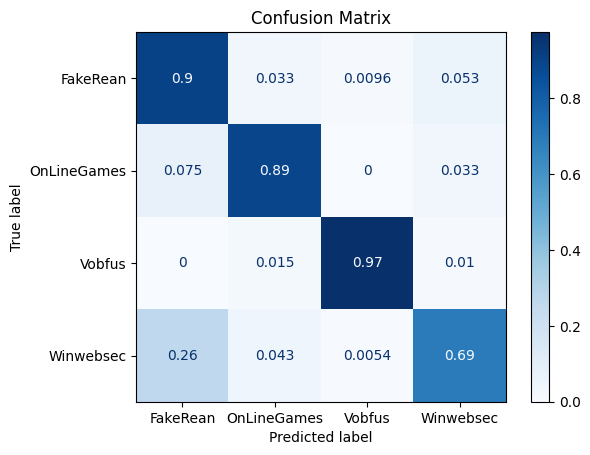

In [11]:
svm = SVC(kernel='linear')
svm.fit(X_train_SVM, y_train_SVM)
y_pred_SVM = svm.predict(X_test_SVM)
accuracy = accuracy_score(y_test_SVM, y_pred_SVM)
print("Accuracy:", accuracy)
cm = confusion_matrix(y_test_SVM, y_pred_SVM)
print("Confusion Matrix:")
print(cm)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
names = ['FakeRean', 'OnLineGames', 'Vobfus', 'Winwebsec']
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## Random Forest

Accuracy: 0.9625
Confusion Matrix:
[[199   2   1   7]
 [  1 208   1   3]
 [  0   2 191   1]
 [  8   3   1 172]]


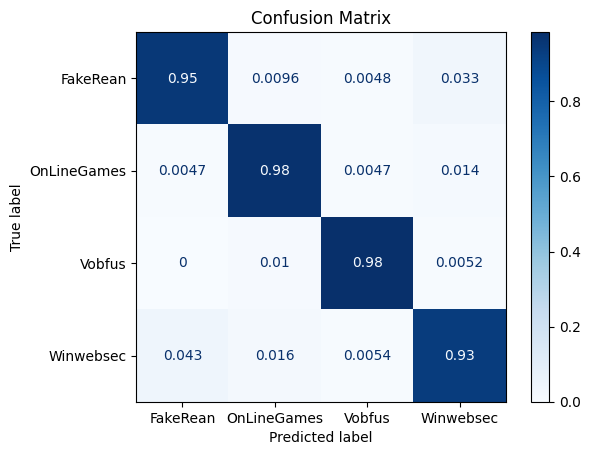

In [12]:
clf = RandomForestClassifier(n_estimators=1000)
clf.fit(X_train_ELSE, y_train_ELSE)
y_pred_ELSE = clf.predict(X_test_ELSE)
accuracy = accuracy_score(y_test_ELSE, y_pred_ELSE)
print("Accuracy:", accuracy)
cm = confusion_matrix(y_test_ELSE, y_pred_ELSE)
print("Confusion Matrix:")
print(cm)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## kNN

Accuracy: 0.885
Confusion Matrix:
[[195   9   0   5]
 [ 10 196   1   6]
 [  1   9 183   1]
 [ 16  30   4 134]]


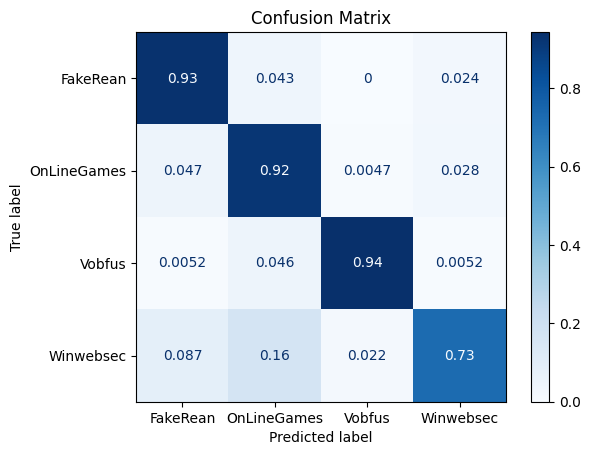

In [13]:
#they used k = sqrt(s) and got 70
# ours is about 63
knn = KNeighborsClassifier(n_neighbors=63)
knn.fit(X_train_ELSE, y_train_ELSE)
y_pred_knn = knn.predict(X_test_ELSE)
accuracy = accuracy_score(y_test_ELSE, y_pred_knn)
print("Accuracy:", accuracy)
cm = confusion_matrix(y_test_ELSE, y_pred_knn)
print("Confusion Matrix:")
print(cm)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
names = ['FakeRean', 'OnLineGames', 'Vobfus', 'Winwebsec']
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## CNN

In [ ]:
#not sure if we need this implementation

#split test data into val and test
X_test_CNN, X_val_CNN, y_test_CNN, y_val_CNN = train_test_split(X_test_ELSE, y_test_ELSE, test_size=0.5, random_state=42)
